In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.distributions import constraints


In [0]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)

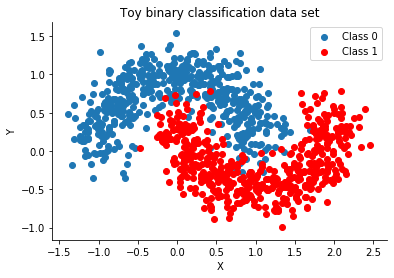

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=.5, random_state = 42)

In [0]:
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())

In [0]:
class Net(nn.Module):
  def __init__(self,input_size,hidden_size):
    super().__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.output=nn.Linear(hidden_size,2)
    self.softmax = nn.Softmax(dim=1)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=self.output(x)
    x=self.softmax(x)
    return x

In [0]:
hidden_layers=10
net=Net(input_size=2,hidden_size=hidden_layers) #Input size is 2
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1)

In [0]:
losses=[]
for epoch in range(10000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

number of epoch 9999 loss tensor(0.3398)
Train Accuracy: 0.974
Test Accuracy: 0.958


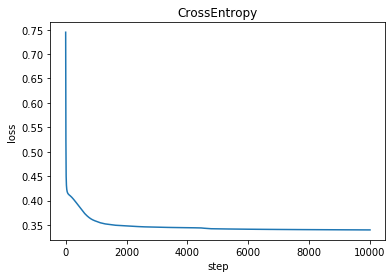

In [18]:
plt.title("CrossEntropy")
plt.xlabel("step")
plt.ylabel("loss")
print('number of epoch', epoch, 'loss', loss.data)
predict_out = net(train_X)
_, predict_y = torch.max(predict_out, 1)
print("Train Accuracy:",accuracy_score(train_y.data, predict_y.data))
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)
print("Test Accuracy:",accuracy_score(test_y.data, predict_y.data))
plt.plot(losses)

In [0]:
#Defining the mesh for contour plots
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 40)
mesh = np.meshgrid(x, y)
a=np.zeros((2000,2))
a[:,0]=np.ravel(mesh[0])
a[:,1]=np.ravel(mesh[1])
contour_test=torch.Tensor(a)

In [0]:
predict_out = net(contour_test)
contour_plot=predict_out.detach().numpy()[:,1]

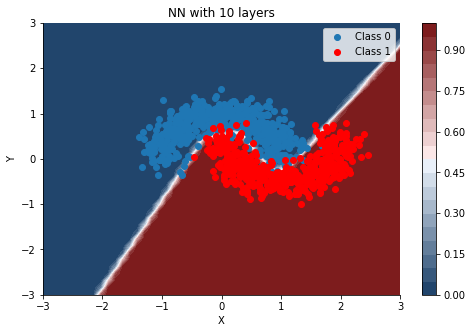

In [21]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 5))
contour=ax.contourf(mesh[0], mesh[1], contour_plot.reshape(40,50),20, cmap=cmap);
cbar = plt.colorbar(contour)
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='NN with {} layers'.format(hidden_layers));